# Import Libraries

In [1]:
import os
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from src.data_loader.data_set import Data_Set
from src.data_loader.freihand_loader import F_DB
from src.constants import MASTER_THESIS_DIR, FREIHAND_DATA
from src.utils import read_json
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import copy
from easydict import EasyDict as edict
from src.utils import read_json
from src.visualization.visualize import plot_hand
from PIL import Image
import cv2

# Read data

In [4]:
config = edict(read_json(f"{MASTER_THESIS_DIR}/src/experiments/config/training_config.json"))
f_db = F_DB(
    root_dir=os.path.join(FREIHAND_DATA, "training", "rgb"),
    labels_path=os.path.join(FREIHAND_DATA, "training_xyz.json"),
    camera_param_path=os.path.join(FREIHAND_DATA, "training_K.json"),
#     transform=None,
    config=config
)

# Define image augmenters

In [58]:
original_image_cv = f_db[5]["image"]
random_cutout  = original_image_cv.copy()
random_cutout[54:94,54:94] =0

original_image = Image.fromarray(original_image_cv[:,:,::-1])
rotated_image = Image.fromarray(cv2.cvtColor(f_db[5]["image"],cv2.COLOR_BGR2RGB))
# colorjitter_image = colorjitter(original_image)
# crop_and_resize_image = resizer(randomcropper(original_image))
# crop_resized_flipped_image = flipper(crop_and_resize_image)
# gaussina_blur_image = Image.fromarray(cv2.cvtColor( cv2.GaussianBlur(original_image_cv,(5,5),0),cv2.COLOR_BGR2RGB))
# random_cutout_image = Image.fromarray(cv2.cvtColor( random_cutout,cv2.COLOR_BGR2RGB))
color_drop = original_image.convert('LA')

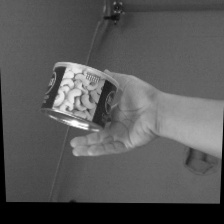

In [12]:
color_drop

In [36]:
gray = cv2.cvtColor(original_image_cv, cv2.COLOR_BGR2GRAY)
sobel_x = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobel_y = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

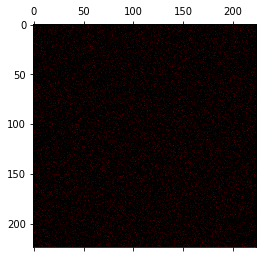

In [59]:
plt.matshow(cv2.randn(np.zeros((224,224,3), np.uint8),(0),(25)))

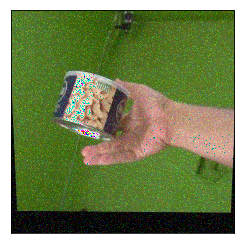

In [68]:
plt.matshow(original_image_cv[:,:,::-1]+cv2.randn(np.zeros((224,224,3), np.uint8),(0),(25,25,25)))
plt.xticks([])
plt.yticks([])
plt.savefig("gaussian_noise.png",dpi=1000)

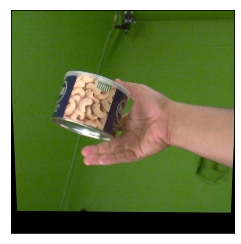

In [69]:
plt.matshow(original_image_cv[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.savefig("hand_jitter.png",dpi=1000)

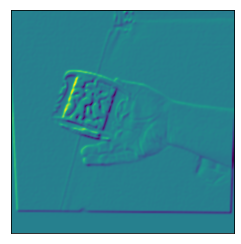

In [41]:
plt.matshow(sobel_x+sobel_y)
plt.xticks([])
plt.yticks([])
plt.savefig("sobel_hand.png",dpi=1000)

## Save augmneted images

In [141]:
color_drop.save("color_drop.png")
original_image.save("original_image.png")
rotated_image.save("rotated_image.png")
colorjitter_image.save("colorjitter_image.png")
crop_and_resize_image.save("crop_and_resize_image.png")
crop_resized_flipped_image.save("crop_resized_flipped_image.png")
gaussina_blur_image.save("gaussina_blur_image.png")
random_cutout_image.save("random_cutout_image.png")
color_drop.save("color_drop.png")